# Задание по кластеризации

Попробуем реализовать эвристику выбора центроидов:
* запустим несколько раз алгоритм, запомним, куда попали центроиды при каждом запуске
* усредним координаты за все несколько запуска.

Попробуйте применить эту эвристику на практике: 

* используйте 10 запусков алгоритма $k$-средних для $k=2$ с параметрами
<pre>
kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
</pre>
* в каждом запуске сохраняйте координаты центроидов общий массив $c$, см. `cluster_centers_ : array, [n_clusters, n_features]`
* визуализируйте координаты точек из $c$ на фоне исходного множества точек

Результат будет примерно такой:
![several_init_knn](img/several_init_knn.png)

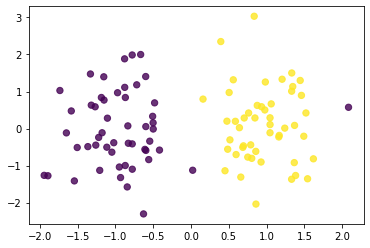

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with open('data/clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, marker='o', alpha=0.8, label='data')
plt.show()

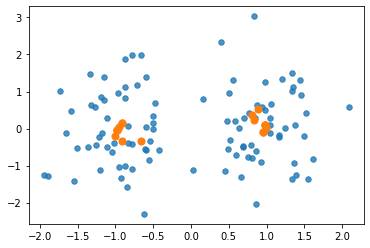

In [2]:
from sklearn.cluster import KMeans

kmeans_centers = []

for i in range(10):
    kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
    kmeans_model.fit(X)

    kmeans_centers.append(kmeans_model.cluster_centers_)


X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])
kmeans_centers = np.reshape(np.array(kmeans_centers), (-1, 2))

plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.8)
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], s=50)
plt.show()

### Задача 2

Посчитать сумму внутрикластерных расстояний от каждой точки до центроида

**Внимание**: циклы использовать запрещено, воспользоваться функциями `numpy`

1 этап: расстояния покоординатно
 [[ 0.38020539 -0.55927447]
 [-0.60637752  0.50697479]
 [-0.91521757 -1.24440362]
 [-0.04433689 -0.35182517]
 [ 0.34915321 -2.27551392]
 [ 0.25933297  1.21319052]
 [-0.56571922 -1.38374371]
 [ 0.99952825 -1.09531246]
 [ 0.19977267 -0.38311782]
 [-0.22993318 -1.09821694]]
2 этап: квадраты расстояний
 [[1.44556140e-01 3.12787928e-01]
 [3.67693700e-01 2.57023437e-01]
 [8.37623192e-01 1.54854038e+00]
 [1.96575990e-03 1.23780947e-01]
 [1.21907966e-01 5.17796360e+00]
 [6.72535918e-02 1.47183123e+00]
 [3.20038230e-01 1.91474666e+00]
 [9.99056730e-01 1.19970939e+00]
 [3.99091177e-02 1.46779264e-01]
 [5.28692659e-02 1.20608045e+00]]
3 этап: суммы квадратов по точкам
 [0.45734407 0.62471714 2.38616357 0.12574671 5.29987157 1.53908482
 2.23478489 2.19876611 0.18668838 1.25894971]
4 этап: расстояния до центроида
 [0.67627218 0.7903905  1.54472119 0.35460782 2.30214499 1.24059857
 1.49491969 1.4828237  0.43207451 1.12202928]
5 этап: сумма этих расстояний
 11.4405824

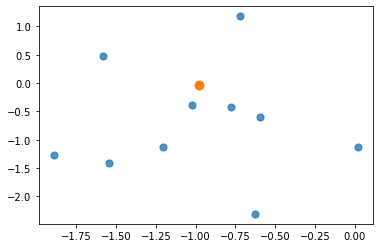

In [3]:
import numpy as np


clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])


# Найдем сумму внутрикластерных расстояний до центроида
intra_cluster_distance = np.sum(np.sqrt(((clust - centroid)**2).sum(axis=1)))

# Или поэтапно для простоты восприятия:
# 1. Найдем расстояния точек до центроида по осям координат
dist1 = clust - centroid
print('1 этап: расстояния покоординатно\n', dist1)
# 2. Возведем эти расстояния в квадрат
dist2 = dist1 ** 2
print('2 этап: квадраты расстояний\n', dist2)
# 3. Просуммируем квадраты координат (по каждой точке в отдельности)
dist3 = dist2.sum(axis=1)
print('3 этап: суммы квадратов по точкам\n', dist3)
# 4. Найдем корень из суммы (Евклидово расстояние)
dist4 = np.sqrt(dist3)
print('4 этап: расстояния до центроида\n', dist4)
# 5. Найдем сумму расстояний (необходимую по заданию)
dist5 = np.sum(dist4)
print('5 этап: сумма этих расстояний\n', dist5)
        
plt.scatter(clust[:, 0], clust[:, 1], s=50, alpha=0.8)
plt.scatter(centroid[0], centroid[1], s=80)
plt.show()

Тестируем корректность вычислений

In [4]:
import unittest

class TestNotebook(unittest.TestCase):
    def test_task(self):
        self.assertAlmostEqual(intra_cluster_distance, 11.44058, places=5)

unittest.main(argv=[''], verbosity=2, exit=False)

test_task (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


**Задача на DBSCAN**

Обучите модель DBSCAN с параметром `min_samples=8` и `eps=0.6`

Визуализируйте результат.

Сравните внутрикластерное расстояние со случаем `min_samples = 3`. Стало лучше или хуже?

In [5]:
import numpy as np
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN

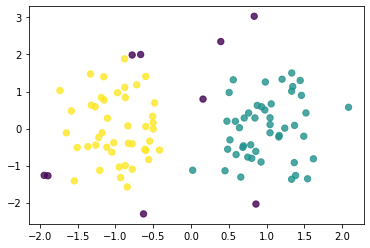

In [6]:
db = DBSCAN(eps=0.6, min_samples=8).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_

plt.scatter(X[:, 0], X[:, 1], s=40, c=labels, marker='o', alpha=0.8, label='data')
plt.show()

Напишем функцию, которая по полученному набору точек найдет центроид и среднее внутрикластерное расстояние

In [7]:
def centroid_and_distance(cluster):
    centroid = [
        np.sum(cluster[:, 0]) / len(cluster),
        np.sum(cluster[:, 1]) / len(cluster)
    ]
    centroid = np.array(centroid)
    
    intra_dist = np.sum(np.sqrt(((cluster - centroid)**2).sum(axis=1))) / len(cluster)
    
    return centroid, intra_dist

In [8]:
clust1 = []
clust2 = []

for i in range(len(X)):
    if labels[i] == 1:
        clust1.append(X[i])
    elif labels[i] == 0:
        clust2.append(X[i])

clust1 = np.array(clust1)
clust2 = np.array(clust2)

centroid1, intra_cluster_distance1 = centroid_and_distance(clust1)
centroid2, intra_cluster_distance2 = centroid_and_distance(clust2)

print('Среднее внутрикластерное расстояние (min_samples = 8):')
print(f'1 кластер - {intra_cluster_distance1}')
print(f'2 кластер - {intra_cluster_distance2}')

Среднее внутрикластерное расстояние (min_samples = 8):
1 кластер - 0.8355105841805215
2 кластер - 0.8012843592813611


Визуализация полученных данных

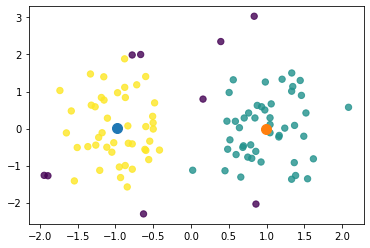

In [9]:
plt.scatter(X[:, 0], X[:, 1], s=40, c=labels, marker='o', alpha=0.8, label='data')
plt.scatter(centroid1[0], centroid1[1], s=100)
plt.scatter(centroid2[0], centroid2[1], s=100)
plt.show()

Проделаем аналогичные операции при `min_samples=3`

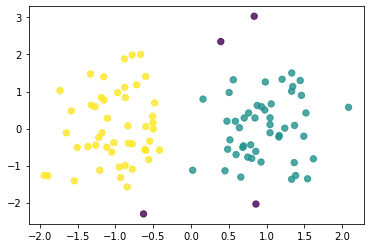

In [10]:
db = DBSCAN(eps=0.6, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_

plt.scatter(X[:, 0], X[:, 1], s=40, c=labels, marker='o', alpha=0.8, label='data')
plt.show()

In [11]:
clust1 = []
clust2 = []

for i in range(len(X)):
    if labels[i] == 1:
        clust1.append(X[i])
    elif labels[i] == 0:
        clust2.append(X[i])

clust1 = np.array(clust1)
clust2 = np.array(clust2)

centroid1, intra_cluster_distance1 = centroid_and_distance(clust1)
centroid2, intra_cluster_distance2 = centroid_and_distance(clust2)

print('Среднее внутрикластерное расстояние (min_samples = 3):')
print(f'1 кластер - {intra_cluster_distance1}')
print(f'2 кластер - {intra_cluster_distance2}')

Среднее внутрикластерное расстояние (min_samples = 3):
1 кластер - 0.9181285732633823
2 кластер - 0.8080526277860972


Как видим, среднее внутрикластерное расстояние во втором случае увеличилось для обоих кластеров, так что при `min_samples=8` результат получается лучше

#### Задача на метрики кластеризации

Обучите *k-means* из модуля sklearn для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта в сравнении со случаем $k=2$? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше мо метрике AMI?

In [12]:
import pickle


with open('data/clustering.pkl', 'rb') as f:
    data = pickle.load(f)

X = np.array(data['X'])
Y = np.array(data['Y'])

kmeans_model2 = KMeans(n_clusters=2).fit(X)
kmeans_model4 = KMeans(n_clusters=4).fit(X)

In [13]:
from sklearn.metrics import silhouette_score


sil_score2 = silhouette_score(X, kmeans_model2.labels_)
sil_score4 = silhouette_score(X, kmeans_model4.labels_)

print('Качество кластеризации по метрике Силуэтта:')
print(f'Для k = 2: {sil_score2:.3f}')
print(f'Для k = 4: {sil_score4:.3f}')

Качество кластеризации по метрике Силуэтта:
Для k = 2: 0.447
Для k = 4: 0.442


По метрике Силуэтта 2 кластера лучше, чем 4

In [14]:
from sklearn.metrics.cluster import adjusted_mutual_info_score


ami_score2 = adjusted_mutual_info_score(Y, kmeans_model2.labels_, average_method='arithmetic')
ami_score4 = adjusted_mutual_info_score(Y, kmeans_model4.labels_, average_method='arithmetic')

print('Качество кластеризации по метрике AMI:')
print(f'Для k = 2: {ami_score2:.3f}')
print(f'Для k = 4: {ami_score4:.3f}')

Качество кластеризации по метрике AMI:
Для k = 2: 0.929
Для k = 4: 0.583


По метрике AMI 2 кластера гораздо лучше, чем 4

In [15]:
sil_scores = []
ami_scores = []

for i in range(2, 40):
    kmeans_model = KMeans(n_clusters=i).fit(X)
    s_score = silhouette_score(X, kmeans_model.labels_)
    a_score = adjusted_mutual_info_score(Y, kmeans_model.labels_, average_method='arithmetic')
    
    sil_scores.append(s_score)
    ami_scores.append(a_score)

Визуализируем метрику Силуэтта для разного количества кластеров:

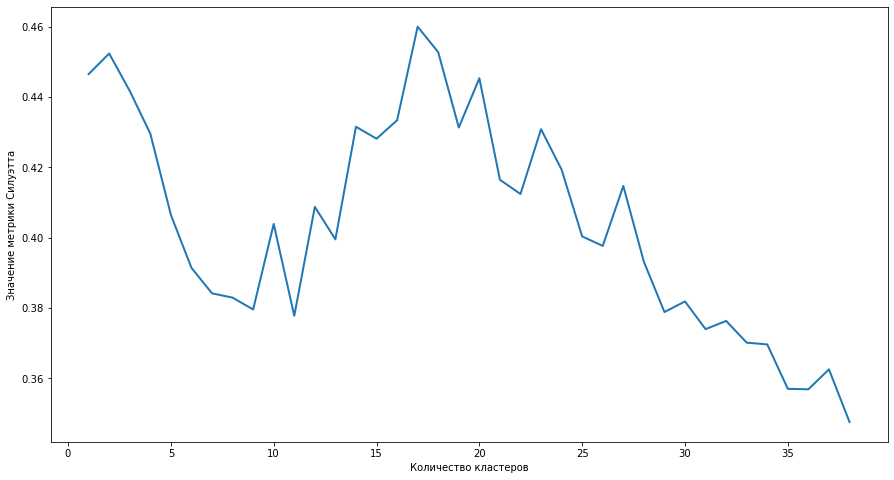

In [16]:
indexes = np.arange(len(sil_scores)) + 1
plt.figure(figsize=(15, 8))
plt.plot(indexes, sil_scores, linewidth=2)
plt.xlabel('Количество кластеров')
plt.ylabel('Значение метрики Силуэтта')
plt.show()

Визуализируем метрику AMI для разного количества кластеров:

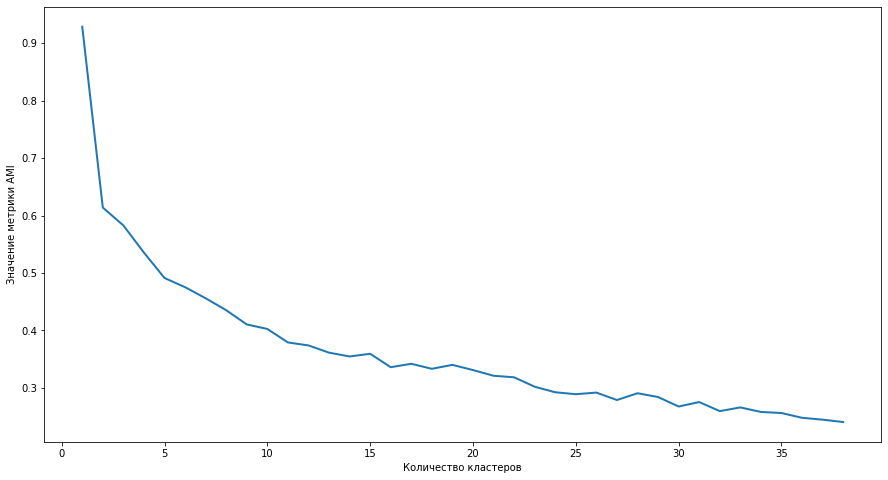

In [17]:
indexes = np.arange(len(ami_scores)) + 1
plt.figure(figsize=(15, 8))
plt.plot(indexes, ami_scores, linewidth=2)
plt.xlabel('Количество кластеров')
plt.ylabel('Значение метрики AMI')
plt.show()

### Домашнее задание по PCA

В домашней работе предлагается применить PCA трехмерным данным по оттоку, которые содержатся в файле `data/client_segmentation.csv`. В файле содержится информация по клиентам оператора связи о том, как изменилось потребление услуг оператора за два месяца:
* call_diff доля звонков
* sms_diff доля смс
* доля интернет-трафика traffic_diff'

Все показатели вычисляются по формуле

$$
\frac{\text{new_value}-\text{old_value}}{\text{old_value}}
$$

В последней колонке customes_class содержится метка по оттоку:
* $0$ - активный пользователя
* $1$ - "спящий" пользователь (редко пользуется услугами)
* $2$ - пользователь, который ушел в отток

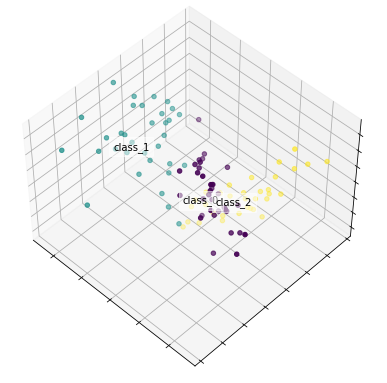

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

df_source = pd.read_csv('data/client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values
# и визуализируем их
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134); plt.cla()
num_labels = np.unique(y).size
for name, label in [('class_%d' % i, i) for i in range(num_labels)]:
    ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean() + 0.5,
        X[y == label, 2].mean(), name, horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([]); ax.w_yaxis.set_ticklabels([]); ax.w_zaxis.set_ticklabels([])
plt.show()

С помощью класса `sklearn.decomposition.PCA` выполните понижение размерности признакового пространства  с $n=3$ до $n=2$ и снова визуализируйте данные. Картинка должна получится примерно такая:
![classification_dim_reduction](img/classification_dim_reduction.png)

Сожмем данные с 3 до 2 размерностей:

In [19]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)
X_pca[:10]

array([[-0.75744517, -0.16623077],
       [-2.61154618, -0.5951692 ],
       [ 0.13301346,  0.37383597],
       [ 1.74983161, -0.27582433],
       [-2.69734129,  0.31624463],
       [ 0.70860533,  0.51547171],
       [ 1.27113452, -0.04822069],
       [-2.16755366, -0.04137214],
       [-2.58986361, -0.08695463],
       [ 1.6981062 ,  1.16822327]])

Визуализируем полученные данные:

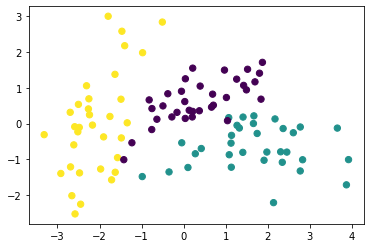

In [34]:
from matplotlib import pyplot as plt


plt.scatter(X_pca[:, 0], X_pca[:, 1], s=40, c=y)
plt.show()

#### Домашнее задание по SVD

В домашней работе предлагаю Вам немного поработать с изображениями (похожий трюк можно увидеть в этой [статье на хабре](https://habr.com/ru/post/275273/)). Для этого нужно установить модуль Pillow (если у вас Анаконда, то https://anaconda.org/anaconda/pillow)

<pre>
pip install Pillow
</pre>

<class 'numpy.ndarray'> (202, 310, 3)


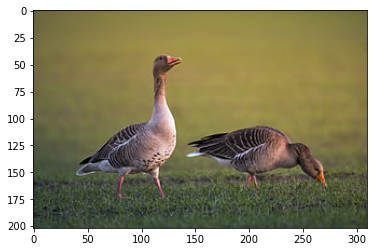

In [21]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg


img = mpimg.imread('img/gray_goose.jpg')
print(type(img),img.shape)
imshow(img)
plt.show()

У нас трёхмерный массив, где третье измерение соответствует цветовой компоненте rgb. Цветную картинку можно преобразовать в двумерную серую (grayscale) с помощью формулы, которую я нашёл [тут](https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python) 

<class 'numpy.ndarray'> (202, 310)
Размер занимаемой памяти - 489.3 Кб


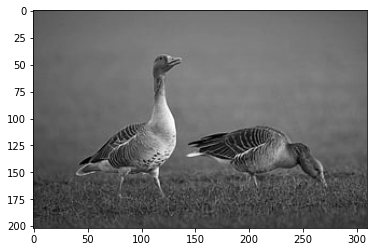

In [22]:
from sys import getsizeof

def rgb2gray(rgb):
    tile = np.tile(np.c_[0.333, 0.333, 0.333], reps=(rgb.shape[0],rgb.shape[1],1))
    return np.sum(tile * rgb, axis=2)


img_gray = rgb2gray(img)
print(type(img_gray), img_gray.shape)
print(f'Размер занимаемой памяти - {getsizeof(img_gray)/1024:.1f} Кб')
imshow(img_gray, cmap = "gray")
plt.show()

Далее 

* обучите на массиве *img_gray* размерности $202 \times 310$ класс TruncatedSVD c параметром n_components=5
* получите матрицу *img_gray_svd* с помощью функции `transform`
* получите массив *img_gray_svd_restored* с помощью функции `inverse_transform`
* визуализируйте массив *img_gray_svd_restored* с помощью функции *imshow*

Этот алгоритм демонстрирует, как происходит сжатие данных большой размерности. А результате у вас должен получиться гусь как бы в очень нечётком виде


<class 'numpy.ndarray'> (202, 5)
Размер занимаемой памяти - 8.0 Кб


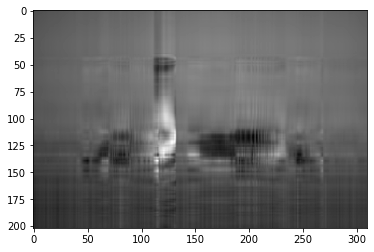

In [32]:
# сжимаем данные до 5 размерностей
truncated_svd = PCA(n_components=5).fit(img_gray)
img_gray_svd = truncated_svd.transform(img_gray)

# восстанавливаем сжатые данные в исходный массив
img_gray_svd_restored = truncated_svd.inverse_transform(img_gray_svd)

print(type(img_gray_svd), img_gray_svd.shape)
print(f'Размер занимаемой памяти - {getsizeof(img_gray_svd)/1024:.1f} Кб')
imshow(img_gray_svd_restored, cmap='gray')
plt.show()

Если число размерностей сделать достаточно большим, это похоже на то, как выглядят сжатые изображения в мессенджерах (например, *Telegram*)

<class 'numpy.ndarray'> (202, 70)
Размер занимаемой памяти - 110.6 Кб


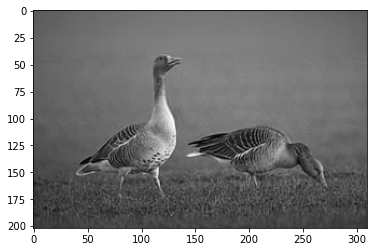

In [33]:
# сжимаем данные до 70 размерностей
truncated_svd = PCA(n_components=70).fit(img_gray)
img_gray_svd = truncated_svd.transform(img_gray)

# восстанавливаем сжатые данные в исходный массив
img_gray_svd_restored = truncated_svd.inverse_transform(img_gray_svd)

print(type(img_gray_svd), img_gray_svd.shape)
print(f'Размер занимаемой памяти - {getsizeof(img_gray_svd)/1024:.1f} Кб')
imshow(img_gray_svd_restored, cmap='gray')
plt.show()

**Домашнее задание на применение t-sne**

Алгоритм выполнения домашней работы:

* выполните PCA преобразование матрицы $X$, передайте новую матрицу в `eval_model`. Какое значение Accuracy получили?
* выполните t-sne преобразование матрицы $X$, передайте новую матрицу в `eval_model`. Какое значение Accuracy получили?

Какие выводы можно сделать?

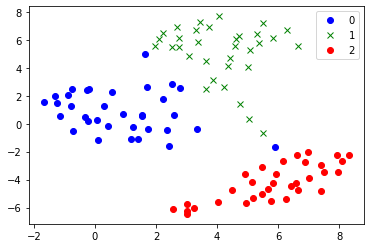

In [25]:
from sklearn.manifold import TSNE

tsne_transformer = TSNE(n_components=2)

x_tsne = tsne_transformer.fit_transform(X)

colors = ['bo', 'gx', 'ro']
# И нарисуем получившиеся точки в нашем новом пространстве
for name, label, color in [('class_%d' % i, i, colors[i]) for i in range(num_labels)]:
    plt.plot(x_tsne[y == label, 0], x_tsne[y == label, 1], color, label=label)
plt.legend(loc=0);

Код для вычисления качества моделей

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

def eval_model(input_x, input_y):
    """Обучаем и валидируем модель"""
    X_train, X_test, y_train, y_test = train_test_split(
        input_x, input_y, test_size=.3, stratify=y, random_state=42
    )
    # Для примера возьмём неглубокое дерево решений
    clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict_proba(X_test)
    acc_score = accuracy_score(y_test, preds.argmax(axis=1))
    print(f'Accuracy: {acc_score:.5f}')
    
df_source = pd.read_csv('data/client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

In [27]:
eval_model(X, y)

Accuracy: 0.80000


Выполним `PCA` преобразование матрицы Х, получим значение Accuracy новой матрицы

In [30]:
from sklearn.decomposition import PCA


pca_transf = PCA(n_components=2).fit(X)
x_pca = pca_transf.transform(X)

eval_model(x_pca, y)

Accuracy: 0.83333


Выполним `t-sne` преобразование матрицы Х, получим значение Accuracy новой матрицы

In [31]:
from sklearn.manifold import TSNE


tsne_transf = TSNE(n_components=2)
x_tsne = tsne_transf.fit_transform(X)

eval_model(x_tsne, y)

Accuracy: 0.90000


*TSNE* преобразование матрицы дает более точные результаты, основываясь на данных метрики функции `eval_model()`